# Curve Fitting and Interstitial Fraction Calculation for 1D data

***

The following fits the code to different statistical distributions, calculates the interstitial fraction, and clusters using the probability mass function of the best fit distribution.

***

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np
from scipy import stats
from scipy.stats import poisson, norm, chi2, cosine, exponnorm, hypsecant, logistic, genlogistic, dweibull, cauchy, exponweib
# Of these distributions, the cosine, exponorm, dweibull, and exponweib fit abysmally, athough this may be a function 

First, the data is imported and fit to the single parameter poisson distribition. Other than the Poisson all of the discrete statistical distributions offered by SciPy, none come close fitting the data well. This isn't unexpected given the Poisson distribution's unique status as a descriptor of a discrete occurances over a continuous interval.  

In [4]:
dframe = pd.read_csv("../data/X001_droplet_amplitudes.csv", header=0)
cluster0 = dframe[dframe['Cluster_1'] == 0]['Ch1'].to_numpy()  # create numpy array for calculations
cluster1 = dframe[dframe['Cluster_1'] == 1]['Ch1'].to_numpy()
#  Fit method of scipy requires initial estimates of the parameters. Given that these summary statistics can be explicitly calculated for the labeled data,
#  I do this here, and then define the bounds as a substantial interval surrounding the calulculated values

#  For the poisson dist. parameters must be manually calculated instead of estimated from best fit, since scipy's continuous distributions lack many of 
#  the methods available for continuous distributions 
lambda0 = cluster0.mean()
lambda1 = cluster1.mean()

stdDev0 = math.sqrt(cluster0.var())
stdDev1 = math.sqrt(cluster1.var())

#  This specific range of bounds is partly informed by EDA showing the large separation between clusters, and will likely need to be tweaked for 
#  messier datasets, possibly requiring a couple iterations to find a good range
bounds0 = [(lambda0-lambda0/2, lambda0+lambda0/2), (stdDev0-stdDev0/2, stdDev0+stdDev0/2)]
bounds1 = [(lambda1-lambda1/2, lambda1+lambda1/2), (stdDev1-stdDev1/2, stdDev1+stdDev1/2)]

To quantify which of the distributions are best, the likelihood function is cacualted for each distribution, for each dataset. The regular likelihood function is the product of the probability of each point belonging to each dataset. The log likelihood function may also be used to make the very small numbers generated by the likelihood function more managable. The log likehood is the summation of the logs of the same probabilities. 

Unfortunently, in a dataset this size, the former tends to be very, very small, and the latter tends to be very, very large, with one causing underflow errors, and the other overflow errors. The likelihood function for each dataset produces zero or NaN for each and every distribution tried, although it may be usable in smaller datasets.

Another thing to note is that the probability function for a given point is 

In [22]:
def log_likelihood(distribution, values, cont):
    '''
    Input: Frozen distribution, values to fit over as a list or dataframe, boolean to flag if distribution is continuous
    Output: Log likelihood of a given set of values being generated by a distribution
    '''
    ll = 0
    if(cont):
       for i in values: 
            ll+= distribution.logpdf(i)[0]
    else:
        for i in values:
            ll+= math.log(distribution.pmf(i))
    return ll    


def likelihood(distribution, values, cont):
    '''
    Input: Frozen distribution, values to fit over as a list or dataframe, boolean to flag if distribution is continuous
    Output: Log likelihood of a given set of values being generated by a distribution
    '''
    ll = []
    if(cont):
       for i in values: 
            ll.append(distribution.pdf(i)[0])
    else:
        for i in values:
            ll.append(distribution.pmf(i))
    
    return np.prod(ll)  
#  I set both of these functions up, but after some reflection, the results may not be directly comparable between discrete and continuous distributions

First, fits are generated using the fit method of SciPy stats and the fits are visualized for each cluster.

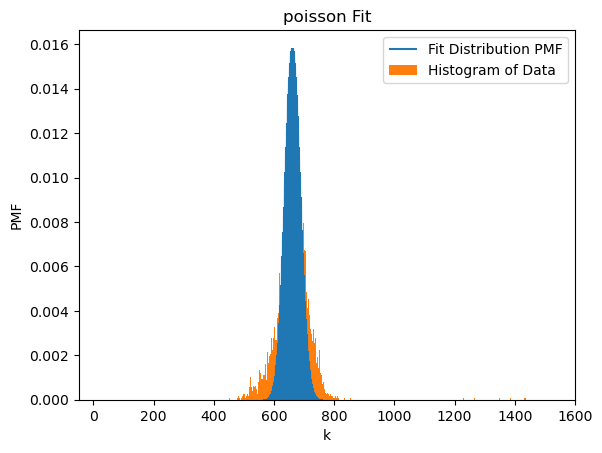

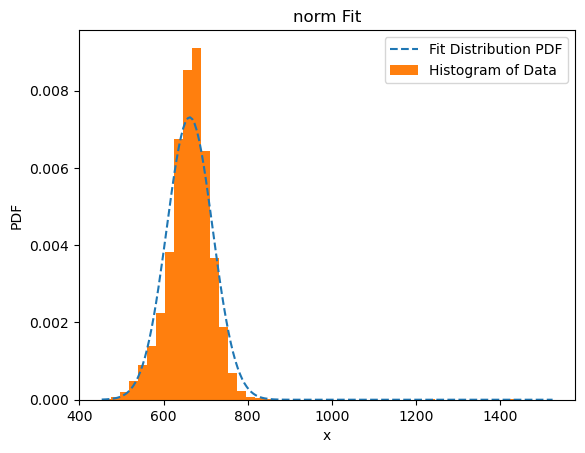

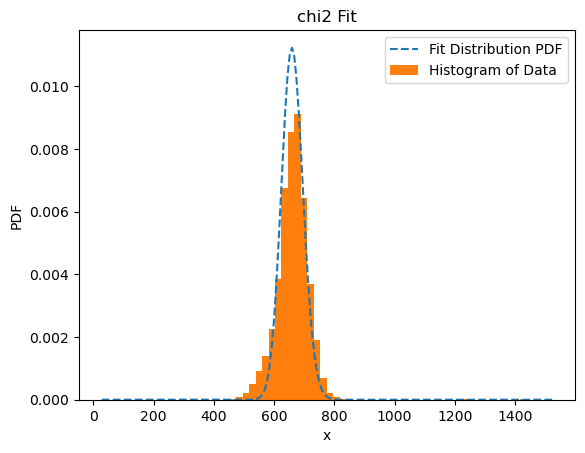

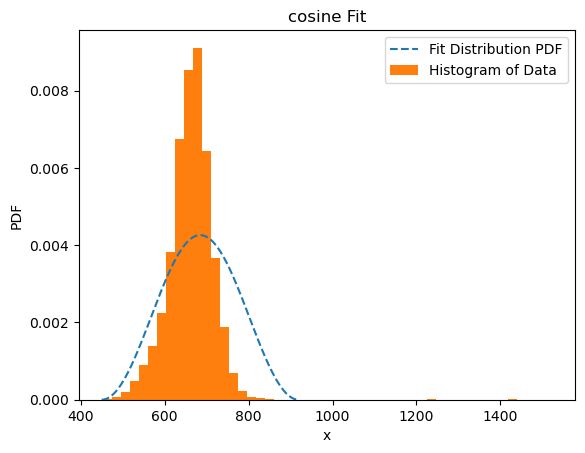

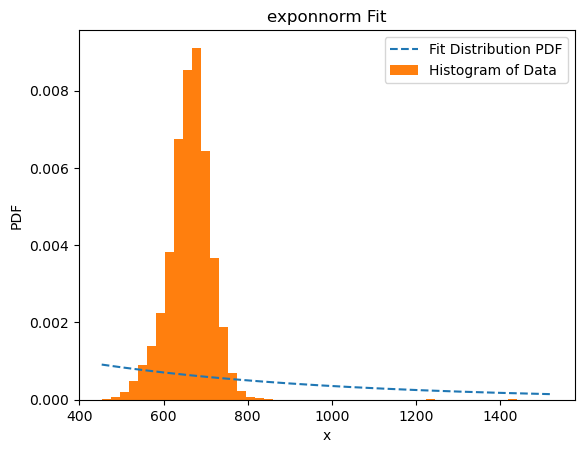

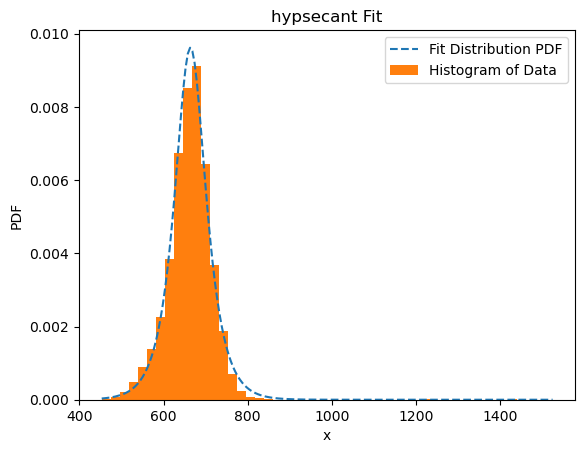

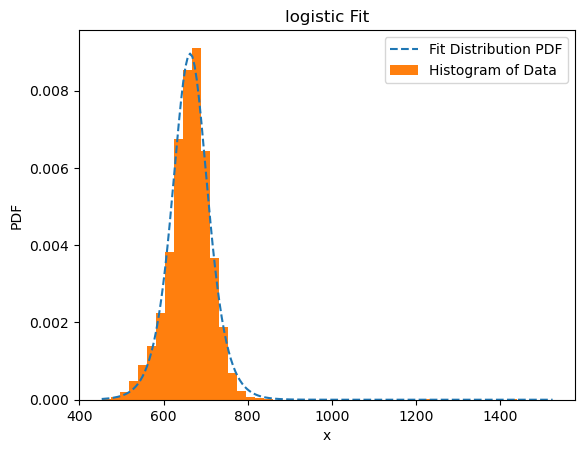

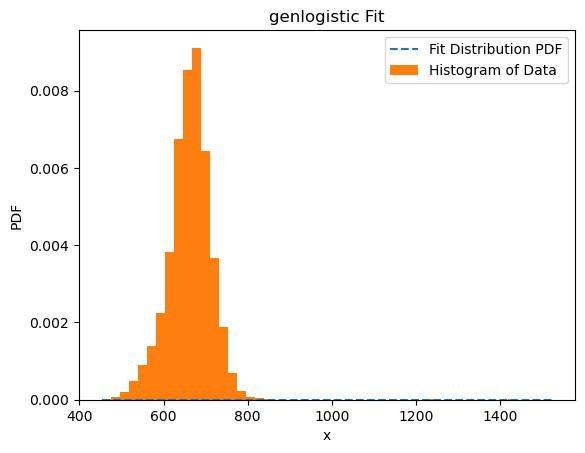

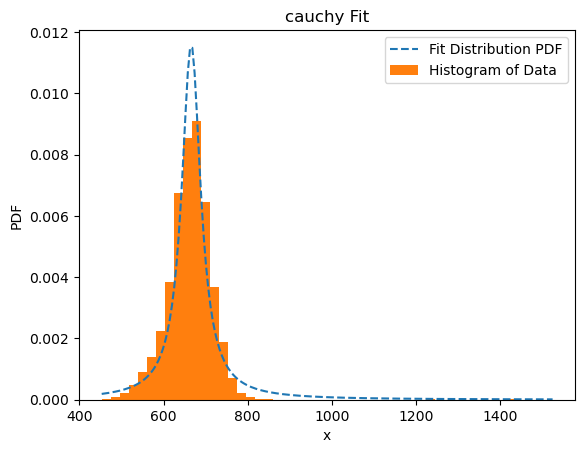

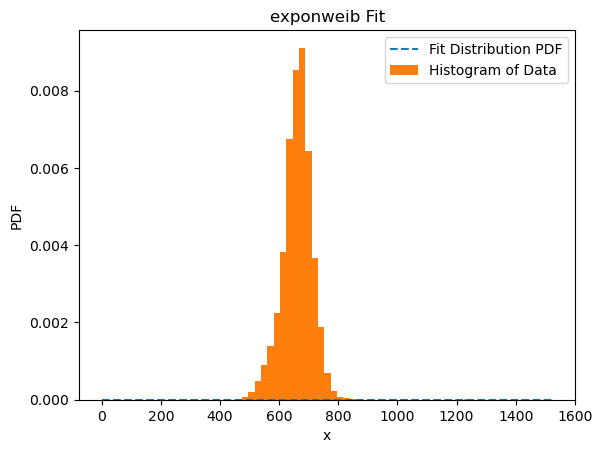

In [16]:
fit0_poisson = stats.fit(poisson, cluster0, bounds0)
fit0_poisson.plot()
plt.show()
fit0_norm = stats.fit(norm, cluster0, bounds0)
fit0_norm.plot()
plt.show()
fit0_chi2 = stats.fit(chi2, cluster0, bounds0)
fit0_chi2.plot()
plt.show()
fit0_cosine = stats.fit(cosine, cluster0, bounds0)
fit0_cosine.plot()
plt.show()
fit0_exponnorm = stats.fit(exponnorm, cluster0, bounds0)
fit0_exponnorm.plot()
plt.show()
fit0_hypsecant = stats.fit(hypsecant, cluster0, bounds0)
fit0_hypsecant.plot()
plt.show()
fit0_logistic = stats.fit(logistic, cluster0, bounds0)
fit0_logistic.plot()
plt.show()
fit0_genlogistic = stats.fit(genlogistic, cluster0, bounds0)
fit0_genlogistic.plot()
plt.show()
fit0_cauchy = stats.fit(cauchy, cluster0, bounds0)
fit0_cauchy.plot()
plt.show()
fit0_exponweib = stats.fit(exponweib, cluster0, bounds0)
fit0_exponweib.plot()
plt.show()

# The following distribution throws errors in the process of curve fitting
#fit0_dweibull = stats.fit(dweibull, cluster0, bounds0)
#fit0_dweibull.plot()
#plt.show()

Calculation of log likelihood:

In [17]:
#  The distributions that are commented out consistantly throw errors when ll is calculated
print("poisson log likelihood: ",log_likelihood(poisson(fit0_poisson.params[0]), cluster0, False))
print("norm log likelihood: ",log_likelihood(norm((fit0_norm.params[0],fit0_norm.params[1])), cluster0, True))
print("Chi squared log likelihood: ", log_likelihood(chi2((fit0_chi2.params[0],fit0_chi2.params[1])), cluster0, True)) 
print("Cosine log likelihood: ",log_likelihood(cosine((fit0_cosine.params[0],fit0_cosine.params[1])), cluster0, True))     
print("exponnorm log likelihood: ", log_likelihood(exponnorm((fit0_exponnorm.params[0],fit0_exponnorm.params[1])), cluster0, True))
#print("hypesecant log likelihood: ", log_likelihood(hypsecant((fit0_hypsecant.params[0],fit0_hypsecant.params[1])), cluster0, True))  #Overflow error, -inf likelihood
print("logistic log likelihood: ",log_likelihood(logistic((fit0_logistic.params[0],fit0_logistic.params[1])), cluster0, True))
print("genlogistic log likelihood: ",log_likelihood(genlogistic((fit0_genlogistic.params[0],fit0_genlogistic.params[1])), cluster0, True))
# print("dweibull log likelihood: ",log_likelihood(dweibull((fit0_dweibull.params[0],fit0_dweibull.params[1])), cluster0, True)) Overflow error, -inf likelihood 
print("cauchy log likelihood: ",log_likelihood(cauchy((fit0_cauchy.params[0],fit0_cauchy.params[1])), cluster0, True))
# print("exponweib log likelihood: ", log_likelihood(exponweib((fit0_exponweib.params[0],fit0_exponweib.params[1])), cluster0, True)) Overflow error, -inf likelihood

poisson log likelihood:  -87507.1117489305
norm log likelihood:  -18744099.485731576
Chi squared log likelihood:  -73878.7777391554
Cosine log likelihood:  -inf
exponnorm log likelihood:  -94365.42851191637
logistic log likelihood:  -486555.4698753055
genlogistic log likelihood:  -8236498.382934041
cauchy log likelihood:  -95063.12707719239


From the likelihood function, the best fit distributions are the chi squared, Poisson, exponential normal, and Cauchy.
From the plots, the exponential normal should be discarded, and the hypesecant and logistic distributions merit considerations.

The disparity from the likelihood function to the plots is likely due to underflow errors, or in the case of the exponormal distribution, the sheer broadness of the curve.

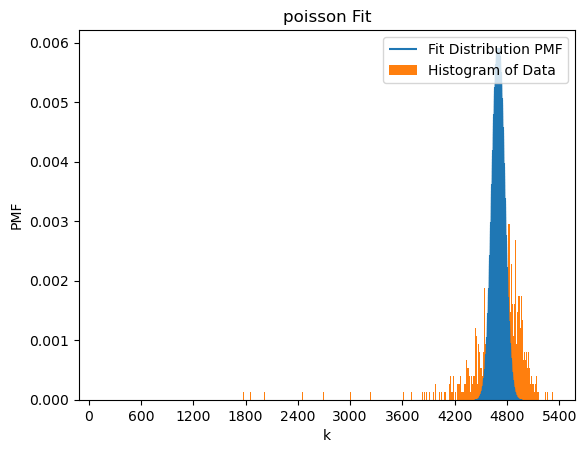

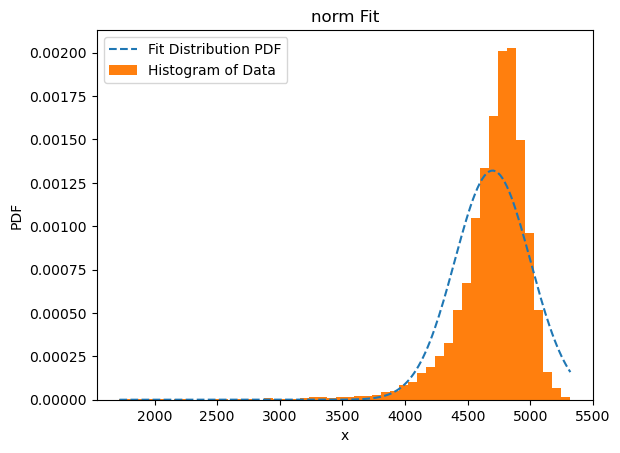

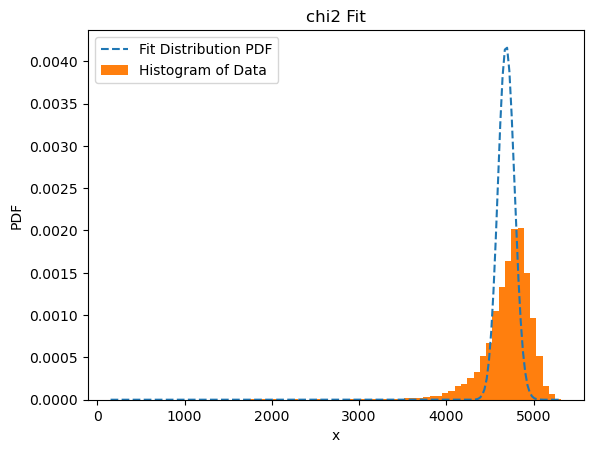

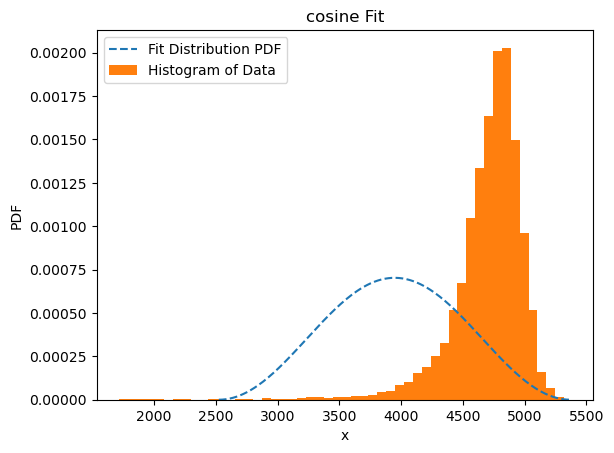

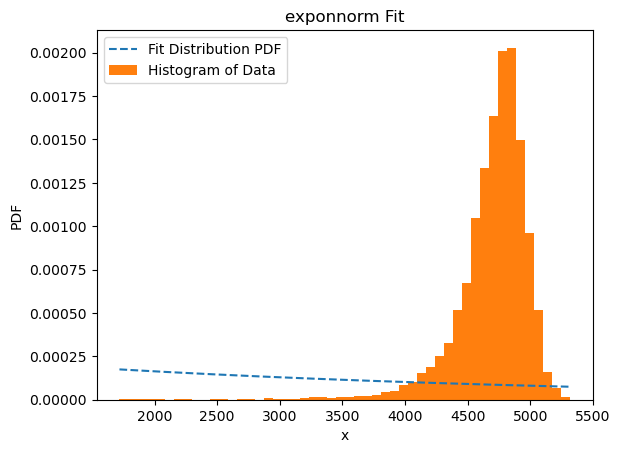

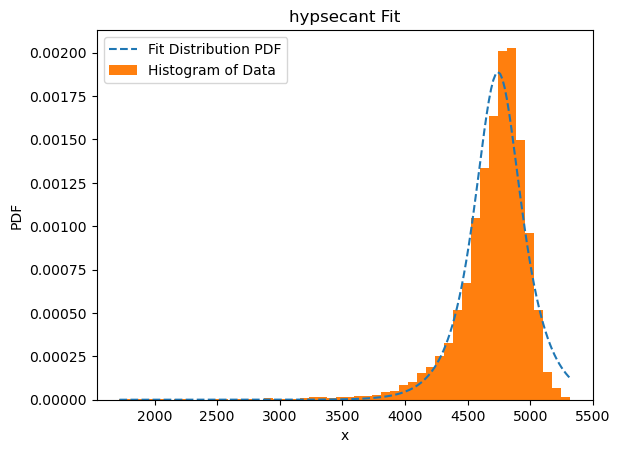

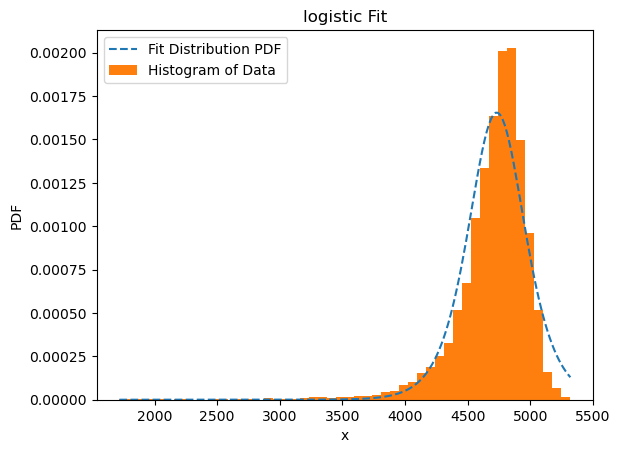

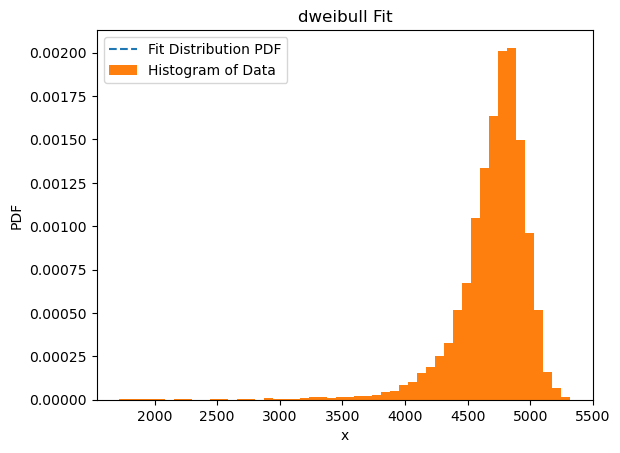

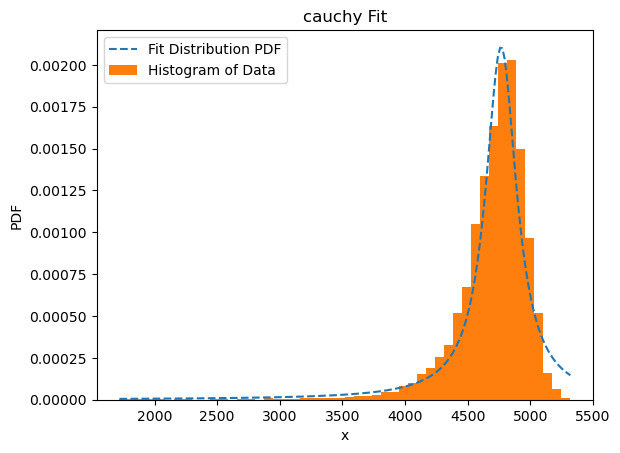

C:\Users\graci\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1836: RuntimeWarning: overflow encountered in power
  negxc = -x**c


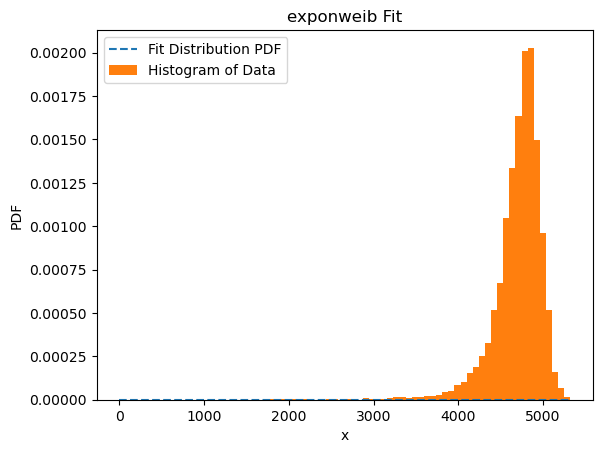

In [12]:
fit1_poisson = stats.fit(poisson, cluster1, bounds1)
fit1_poisson.plot()
plt.show()
fit1_norm = stats.fit(norm, cluster1, bounds1)
fit1_norm.plot()
plt.show()
fit1_chi2 = stats.fit(chi2, cluster1, bounds1)
fit1_chi2.plot()
plt.show()
fit1_cosine = stats.fit(cosine, cluster1, bounds1)
fit1_cosine.plot()
plt.show()
fit1_exponnorm = stats.fit(exponnorm, cluster1, bounds1)
fit1_exponnorm.plot()
plt.show()
fit1_hypsecant = stats.fit(hypsecant, cluster1, bounds1)
fit1_hypsecant.plot()
plt.show()
fit1_logistic = stats.fit(logistic, cluster1, bounds1)
fit1_logistic.plot()
plt.show()
fit1_dweibull = stats.fit(dweibull, cluster1, bounds1)
fit1_dweibull.plot()
plt.show()
fit1_cauchy = stats.fit(cauchy, cluster1, bounds1)
fit1_cauchy.plot()
plt.show()

# Error prone
#fit1_exponweib = stats.fit(exponweib, cluster1, bounds1)
#fit1_exponweib.plot()
#plt.show()

Calculation of log likelihood and likelihood functions:

In [18]:
#print("poisson log likelihood: ",log_likelihood(poisson(fit1_poisson.params[0]), cluster1, False))
print("norm log likelihood: ",log_likelihood(norm((fit1_norm.params[0],fit1_norm.params[1])), cluster1, True))
print("Chi squared log likelihood: ", log_likelihood(chi2((fit1_chi2.params[0],fit1_chi2.params[1])), cluster1, True)) 
print("Cosine log likelihood: ",log_likelihood(cosine((fit1_cosine.params[0],fit1_cosine.params[1])), cluster1, True))     
print("exponnorm log likelihood: ", log_likelihood(exponnorm((fit1_exponnorm.params[0],fit1_exponnorm.params[1])), cluster1, True))
print("hypesecant log likelihood: ", log_likelihood(hypsecant((fit1_hypsecant.params[0],fit1_hypsecant.params[1])), cluster1, True)) #   Overflow error, -inf likelihood
print("logistic log likelihood: ",log_likelihood(logistic((fit1_logistic.params[0],fit1_logistic.params[1])), cluster1, True))
print("dweibull log likelihood: ",log_likelihood(dweibull((fit1_dweibull.params[0],fit1_dweibull.params[1])), cluster1, True)) #  Overflow error, -inf likelihood 
print("cauchy log likelihood: ",log_likelihood(cauchy((fit1_cauchy.params[0],fit1_cauchy.params[1])), cluster1, True))
#print("exponweib log likelihood: ", log_likelihood(exponweib((fit1_exponweib.params[0],fit1_exponweib.params[1])), cluster1, True)) # Overflow error, -inf likelihood

norm log likelihood:  -339857823.7138421
Chi squared log likelihood:  -93274.96982772613
Cosine log likelihood:  -inf
exponnorm log likelihood:  -70509.53883232315
hypesecant log likelihood:  -inf
logistic log likelihood:  -1480607.140533778
dweibull log likelihood:  -inf
cauchy log likelihood:  -79334.2499671212


From this and the previous distribution, those left in the running are Cauchy, Poisson, hypesecant, and logistic. The latter two log likelihood functions are conspicuously low, but I attribute this to issues with calculations. 

Finially, we calculate the interstitial fraction for each of the selected distributions, and visuaize the results.

In [88]:
# Plotting function
def IFhist(data1,data2,bound1,bound2,distName):
    '''
    Bound1 is upper bound on data1, bound2 is lower bound on data2
    '''
    # plotting histograms
    in_range = [x for x in data1 if x<=bound1] + [y for y in data2 if y>=bound2]
    interstitial = [x for x in data1 if x>bound1] + [y for y in data2 if y<bound2]
    plt.hist(interstitial, bins=200, color='m', label='Interstitial')
    plt.hist(in_range, bins=200, color='b', label='In-Range')
    plt.legend(loc='upper right')
    plt.title('Intersitial Fraction Given by '+distName+" Distribution")
    plt.show()
    return

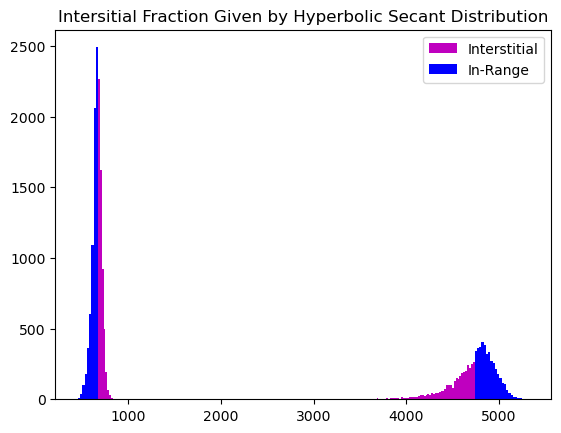


The upper bound on cluster 0 is:  670.11 , and the lower bound on cluster 1 is: 4736.56
The interstitial fraction of the data is:  45.34%
Of the interstitial points, 62.03 % are contributed by cluster0 and 37.97 % are contributed by cluster1


In [103]:
# Alpha is the probability value that we choose to 
alpha = 0.001

# For channel zero we seek the wavelelngth where CDF(X<x) = 1 - alpha (above the range)
bound_cluster0 = hypsecant.ppf(1-alpha, (fit0_hypsecant.params))[0]
# For channel one, we seek the wavelength where CDF(X<x) = alpha (below the range)
bound_cluster1 = hypsecant.ppf(alpha, (fit1_hypsecant.params))[0]

# By converting each cluster vector into a logical vector and summing it, we determine the fraction of data points that are out of spec
interstitialFraction = ((cluster1<bound_cluster1).sum()+(cluster0>bound_cluster0).sum())/(cluster1.size+cluster0.size)
interstitialFraction0 = (cluster0>bound_cluster0).sum()/(cluster1.size+cluster0.size)
interstitialFraction1 = (cluster1<bound_cluster1).sum()/(cluster1.size+cluster0.size)

IFhist(cluster0,cluster1,bound_cluster0,bound_cluster1,"Hyperbolic Secant")
print()
print(f"The upper bound on cluster 0 is:  {bound_cluster0:.2f} , and the lower bound on cluster 1 is: {bound_cluster1:.2f}")
print(f"The interstitial fraction of the data is:  {interstitialFraction*100:.2f}%")
print(f"Of the interstitial points, {interstitialFraction0/interstitialFraction*100:.2f} % are contributed by cluster0 and {interstitialFraction1/interstitialFraction*100:.2f} % are contributed by cluster1")


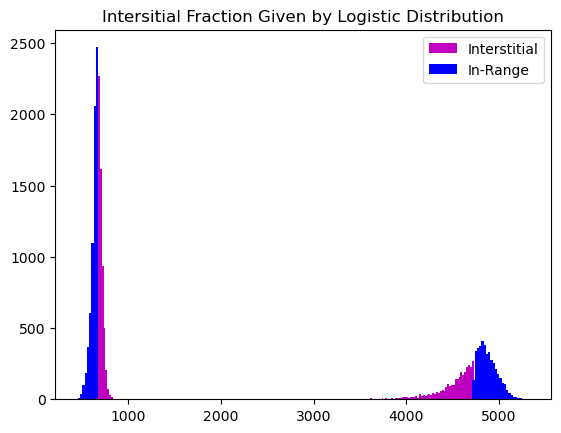


The upper bound on cluster 0 is:  669.91, and the lower bound on cluster 1 is: 4725.78
The interstitial fraction of the data is:  44.78%
Of the interstitial points, 63.04 % are contributed by cluster0 and 36.96 % are contributed by cluster1


In [104]:

bound_cluster0 = logistic.ppf(1-alpha, (fit0_logistic.params))
bound_cluster1 = logistic.ppf(alpha, (fit1_logistic.params))[0]
bound_cluster0 = logistic.ppf(1-alpha, (fit0_logistic.params))[0]
bound_cluster1 = logistic.ppf(alpha, (fit1_logistic.params))[0]

interstitialFraction = ((cluster1<bound_cluster1).sum()+(cluster0>bound_cluster0).sum())/(cluster1.size+cluster0.size)
interstitialFraction0 = (cluster0>bound_cluster0).sum()/(cluster1.size+cluster0.size)
interstitialFraction1 = (cluster1<bound_cluster1).sum()/(cluster1.size+cluster0.size)


IFhist(cluster0,cluster1,bound_cluster0,bound_cluster1,"Logistic")
print()
print(f"The upper bound on cluster 0 is:  {bound_cluster0:.2f}, and the lower bound on cluster 1 is: {bound_cluster1:.2f}")
print(f"The interstitial fraction of the data is:  {interstitialFraction*100:.2f}%")
print(f"Of the interstitial points, {interstitialFraction0/interstitialFraction*100:.2f} % are contributed by cluster0 and {interstitialFraction1/interstitialFraction*100:.2f} % are contributed by cluster1")

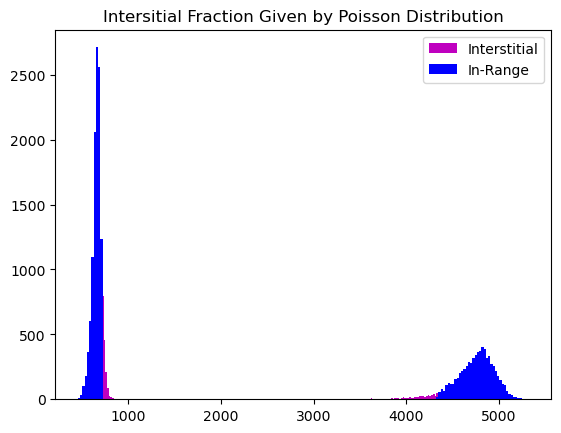


The upper bound on cluster 0 is:  713.00, and the lower bound on cluster 1 is: 4341.00
The interstitial fraction of the data is:  11.27%
Of the interstitial points, 71.42 % are contributed by cluster0 and 28.58 % are contributed by cluster1


In [105]:
bound_cluster0 = poisson.ppf(1-alpha, (fit0_poisson.params))[0]
bound_cluster1 = poisson.ppf(alpha, (fit1_poisson.params))[0]

interstitialFraction = ((cluster1<bound_cluster1).sum()+(cluster0>bound_cluster0).sum())/(cluster1.size+cluster0.size)
interstitialFraction0 = (cluster0>bound_cluster0).sum()/(cluster1.size+cluster0.size)
interstitialFraction1 = (cluster1<bound_cluster1).sum()/(cluster1.size+cluster0.size)

IFhist(cluster0,cluster1,bound_cluster0,bound_cluster1,"Poisson")
print()
print(f"The upper bound on cluster 0 is:  {bound_cluster0:.2f}, and the lower bound on cluster 1 is: {bound_cluster1:.2f}")
print(f"The interstitial fraction of the data is:  {interstitialFraction*100:.2f}%")
print(f"Of the interstitial points, {interstitialFraction0/interstitialFraction*100:.2f} % are contributed by cluster0 and {interstitialFraction1/interstitialFraction*100:.2f} % are contributed by cluster1")

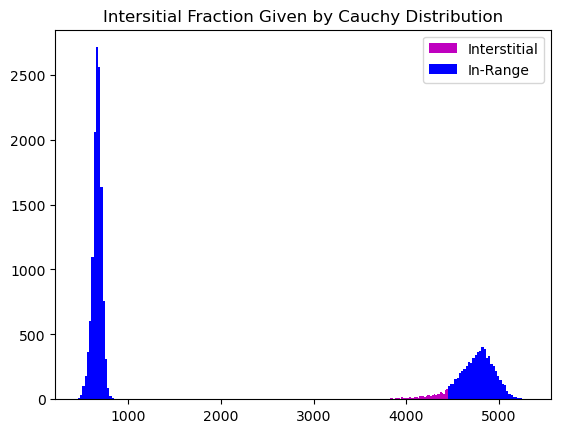


The upper bound on cluster 0 is:  983.81, and the lower bound on cluster 1 is: 4449.29
The interstitial fraction of the data is:  5.05%
Of the interstitial points, 1.58 % are contributed by cluster0 and 98.42 % are contributed by cluster1


In [106]:

# Re-Using these variables
bound_cluster0 = cauchy.ppf(1-alpha, (fit0_cauchy.params))
bound_cluster1 = cauchy.ppf(alpha, (fit1_cauchy.params))[0]
bound_cluster0 = cauchy.ppf(1-alpha, (fit0_cauchy.params))[0]
bound_cluster1 = cauchy.ppf(alpha, (fit1_cauchy.params))[0]

interstitialFraction = ((cluster1<bound_cluster1).sum()+(cluster0>bound_cluster0).sum())/(cluster1.size+cluster0.size)
interstitialFraction0 = (cluster0>bound_cluster0).sum()/(cluster1.size+cluster0.size)
interstitialFraction1 = (cluster1<bound_cluster1).sum()/(cluster1.size+cluster0.size)

IFhist(cluster0,cluster1,bound_cluster0,bound_cluster1,"Cauchy")
print()
print(f"The upper bound on cluster 0 is:  {bound_cluster0:.2f}, and the lower bound on cluster 1 is: {bound_cluster1:.2f}")
print(f"The interstitial fraction of the data is:  {interstitialFraction*100:.2f}%")
print(f"Of the interstitial points, {interstitialFraction0/interstitialFraction*100:.2f} % are contributed by cluster0 and {interstitialFraction1/interstitialFraction*100:.2f} % are contributed by cluster1")

# Takeaways

Of all that I've tried here, I like think that the Poisson and Cauchy distributions are the best choice for this dataset. The other distributions give results that are, visually or quantatitivly unreasonable.

The Poisson distribution seems the most consistant across the two, very differently distributed clusters, and the Cauchy distributions seems to disproportionatly section out the leftmost "shoulder" on cluster 1.

For all distributions, a very, very low alpha is necessary to segment out those points that are truley in the interstice.

All of this is somewhat exploratory, and subject to change in higher dimensional data.